In [ ]:
!git clone https://github.com/Algy/fast-slic
#!git clone https://github.com/Algy/fast-slic.git


Cloning into 'fast-slic'...
remote: Enumerating objects: 1541, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1541 (delta 2), reused 0 (delta 0), pack-reused 1535
Receiving objects: 100% (1541/1541), 2.13 MiB | 4.25 MiB/s, done.
Resolving deltas: 100% (1024/1024), done.


In [ ]:
!git clone https://github.com/Algy/fast-slic
#pip install fast_slic
!pip install fast_slic


fatal: destination path 'fast-slic' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fast_slic: filename=fast_slic-0.4.0-cp310-cp310-linux_x86_64.whl size=2384667 sha256=53973a6ff5d907beb427ba4e5cbdd641f778435d227a8931d7e86ab7dc019a49
  Stored in directory: /root/.cache/pip/wheels/b7/a1/a0/ecbaea317ed5c5225cb36eee08246c1ecb6c6b1599b10006f3
Successfully built fast_slic


In [ ]:
import numpy as np #numerical operations

from fast_slic import Slic #Simple Linear Iterative Clustering
from PIL import Image #Python Image Library

with Image.open("/content/test.png") as f: #To open image
   image = np.array(f) #converts image into a NumPy array


# import cv2; image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)   # You can convert the image to CIELAB space if you need.


slic = Slic(num_components=1600, compactness=10)  # num_components - The desired number of superpixels. Here 1600 superpixels are generated.
                                                  # compactness: Balances color proximity and spatial proximity. Higher values make the superpixels more regularly shaped.
assignment = slic.iterate(image) # assignment variable represents the Cluster Map
print(assignment)
print(slic.slic_model.clusters)  #Information about the clusters generated by the SLIC algorithm

In [ ]:
import numpy as np
from fast_slic import Slic
from PIL import Image
import cv2  # Import OpenCV for color space conversion

# Open the image
image_path = "/content/test1.png"  # Replace with your image path
with Image.open(image_path) as img:
    image = np.array(img)

# Check the number of color channels
num_channels = image.shape[-1]

# Convert the image to RGB if it's not in that format
if num_channels != 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Now, you can use the fast_slic algorithm
slic = Slic(num_components=1600, compactness=10)
assignment = slic.iterate(image)  # Cluster Map
print(assignment)
print(slic.slic_model.clusters)


[[   0    0    0 ...   37   37   37]
 [   0    0    0 ...   37   37   37]
 [   0    0    0 ...   37   37   37]
 ...
 [1432 1432 1432 ... 1429 1429 1429]
 [1432 1432 1432 ... 1429 1429 1429]
 [1432 1432 1432 ... 1429 1429 1429]]
[{'number': 0, 'yx': (9.0, 10.0), 'color': (199.0, 128.0, 128.0), 'num_members': 149}, {'number': 1, 'yx': (18.0, 30.0), 'color': (25.0, 140.0, 132.0), 'num_members': 10}, {'number': 2, 'yx': (5.0, 33.0), 'color': (198.0, 128.0, 128.0), 'num_members': 110}, {'number': 3, 'yx': (4.0, 58.0), 'color': (200.0, 128.0, 128.0), 'num_members': 98}, {'number': 4, 'yx': (5.0, 81.0), 'color': (200.0, 128.0, 128.0), 'num_members': 84}, {'number': 5, 'yx': (5.0, 100.0), 'color': (200.0, 128.0, 128.0), 'num_members': 68}, {'number': 6, 'yx': (5.0, 117.0), 'color': (200.0, 128.0, 128.0), 'num_members': 68}, {'number': 7, 'yx': (5.0, 135.0), 'color': (200.0, 128.0, 128.0), 'num_members': 76}, {'number': 8, 'yx': (5.0, 154.0), 'color': (200.0, 128.0, 128.0), 'num_members': 76}, 

In [ ]:
import numpy as np

# Much faster than the standard class
from fast_slic.avx2 import SlicAvx2
from PIL import Image

with Image.open("/content/test.png") as f:
   image = np.array(f)
# import cv2; image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)   # You can convert the image to CIELAB space if you need.
slic = SlicAvx2(num_components=1600, compactness=10)
assignment = slic.iterate(image) # Cluster Map
print(assignment)
print(slic.slic_model.clusters) # The cluster information of superpixels.
print(image)

ValueError: ignored

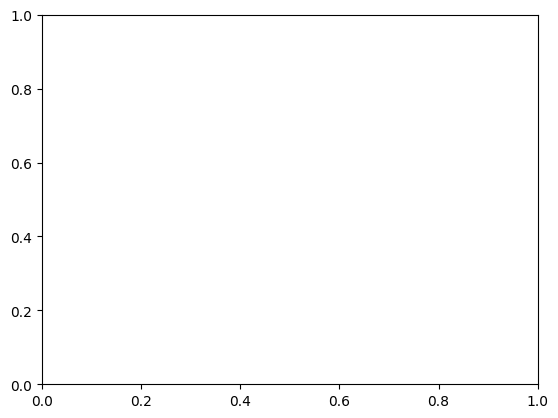

In [ ]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

# load the image and convert it to a floating point data type
image = img_as_float(io.imread("/content/test.png"))


# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image, n_segments = 250, sigma = 5)

# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments%")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

# show the plots
plt.show()

ValueError: ignored

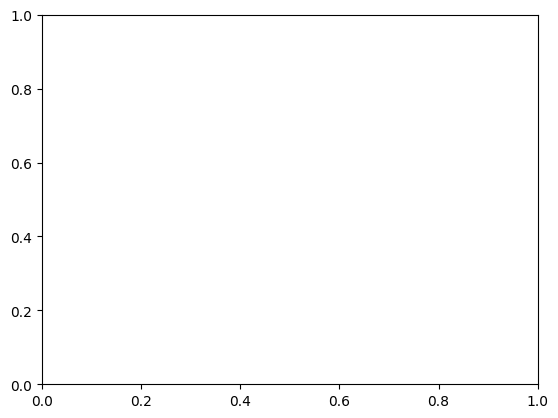

In [ ]:
import numpy as np
from fast_slic import Slic
from PIL import Image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2

# Open the image
image_path = "/content/test1.png"  # Replace with your image path
with Image.open(image_path) as img:
    image = np.array(img)

# Check the number of color channels
num_channels = image.shape[-1]

# Convert the image to RGB if it's not in that format
if num_channels != 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run the fast_slic algorithm
slic = Slic(num_components=1600, compactness=10)
segments = slic.iterate(image)  # Cluster Map

# Plot the superpixels with boundaries
fig = plt.figure("Superpixels -- %d segments")
ax = fig.add_subplot(1, 1, 1)

# Ensure the color array has the same shape as the input image
color_array = np.random.randint(0, 255, size=(image.shape[0], image.shape[1], 3))

ax.imshow(mark_boundaries(image, segments, color=color_array))
plt.axis("off")
plt.show()


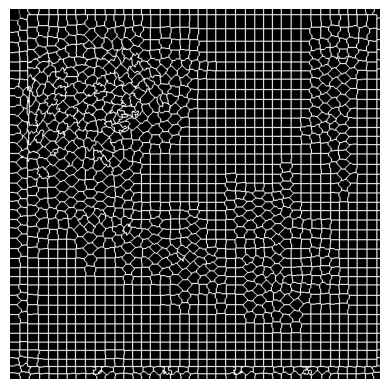

In [ ]:
import numpy as np
from fast_slic import Slic
from PIL import Image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2

# Open the image
image_path = "/content/test3.png"  # Replace with your image path
with Image.open(image_path) as img:
    image = np.array(img)

# Check the number of color channels
num_channels = image.shape[-1]

# Convert the image to RGB if it's not in that format
if num_channels != 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run the fast_slic algorithm
slic = Slic(num_components=1600, compactness=100)
segments = slic.iterate(image)  # Cluster Map

# Assign random colors to each segment
unique_segments = np.unique(segments)
color_array = np.random.randint(0, 255, size=(len(unique_segments), 3))

# Create an image with colored segments
colored_segments = color_array[segments]

# Plot the superpixels with boundaries
fig = plt.figure("Superpixels -- %d segments")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(colored_segments, segments, color=(1, 1, 1)))
plt.axis("off")
plt.show()


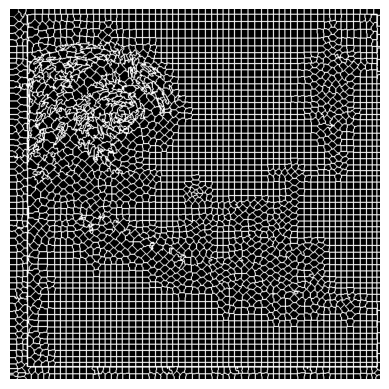

In [ ]:
import numpy as np
from fast_slic import Slic
from PIL import Image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2

# Open the image
image_path = "/content/test3.png"  # Replace with your image path
with Image.open(image_path) as img:
    image = np.array(img)

# Check the number of color channels
num_channels = image.shape[-1]

# Convert the image to RGB if it's not in that format
if num_channels != 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run the fast_slic algorithm
slic = Slic(num_components=4000, compactness=10)
segments = slic.iterate(image)  # Cluster Map

# Assign random colors to each segment
unique_segments = np.unique(segments)
color_array = np.random.randint(0, 255, size=(len(unique_segments), 3))

# Create an image with colored segments
colored_segments = color_array[segments]

# Plot the superpixels with boundaries
fig = plt.figure("Superpixels -- %d segments")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(colored_segments, segments, color=(1, 1, 1)))
plt.axis("off")
plt.show()


In [ ]:
import numpy as np

from fast_slic import Slic
from PIL import Image

with Image.open("/content/sample_data/fish.jpg") as f:
   image = np.array(f)
# import cv2; image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)   # You can convert the image to CIELAB space if you need.
slic = Slic(num_components=1600, compactness=10)
assignment = slic.iterate(image) # Cluster Map
print(assignment)
print(slic.slic_model.clusters) # The cluster information of superpixels.

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 19 08:12:03 2023

@author: mounikaghanta
"""

#pip install fast-slic
#conda install -c conda-forge fast-slic


import numpy as np
import fast_slic
from fast_slic import slic3d

# Create 3D data (replace this with your actual 3D data)
width, height, depth = 100, 500, 500
data = np.random.rand(width, height, depth)

# Reshape the data to a 2D array where each row represents a 3D point
reshaped_data = data.reshape(-1, data.shape[-1])

# Set the number of desired superpixels and compactness
n_segments = 100
compactness = 10.0

# Create and fit the slic3D model
slic3d = Slic3D(n_segments=n_segments, compactness=compactness)
slic3d.fit(reshaped_data)

# Get the labels assigned to each pixel
labels = slic3d.labels_

# Reshape the labels back to the original 3D shape
segmented_result = labels.reshape(data.shape[:-1])

# Now `segmented_result` contains the segmentation result for your 3D data


ImportError: ignored